In [1]:
from conditions import DirectTaskCondition, InverseTaskCondition
from models import ModelWithMeasure, ModelWithMeasureWithoutOxy
from solvers import DirectTaskSolverRK45, InverseTaskSolverDE
from shower import Shower
from residual_functions import residual_function_without_oxy

import time
import numpy as np

In [2]:
initial_data = [0.5, 0.3, 0.02]
left_time_border = 0
right_time_border = 365
delta_time_grid = 7
time_grid = list(np.arange(left_time_border, right_time_border, delta_time_grid))

parameters = [8, 1, 0.25, 0.1, 
              0.3, 0.4, 0.1, 0.1, 
              0.1, 0.25, 0.25, 1, 
              0.15, 0.5, 0.5, 0.25]

bounds_with_oxy = [(4, 12), (0.5, 1.5), (0.125, 0.375), (0.05, 0.15),
          (0.15, 0.45), (0.2, 0.6), (0.05, 0.15), (0.05, 0.15),
          (0.05, 0.15), (0.125, 0.375), (0.125, 0.375), (0.5, 1.5),
          (0.075, 0.225), (0.25, 0.75), (0.25, 0.75), (0.125, 0.375), (0, 2)]

max_iter = 10
popsize = 150
seed = 1
    

In [3]:
direct_task_condition = DirectTaskCondition(
    initial_data,
    left_time_border,
    right_time_border,
    time_grid,
)
print(direct_task_condition)

pass


In [4]:
model_with_measure = ModelWithMeasure(*parameters)

direct_solver = DirectTaskSolverRK45(model_with_measure)

solution = direct_solver.get_solution(direct_task_condition)

In [5]:
shower = Shower()

(<Figure size 1600x800 with 1 Axes>,
 <Axes: title={'center': 'DEFAULT_TITLE'}, xlabel='Time', ylabel='C, U, V'>)

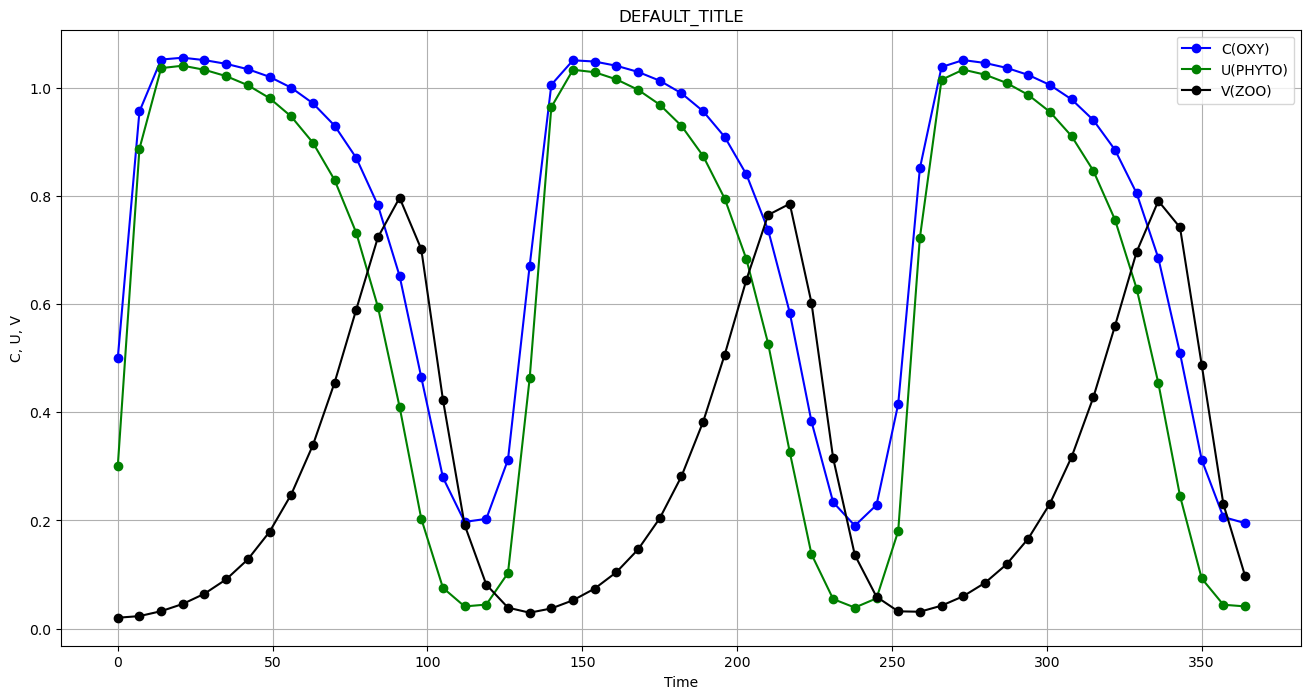

In [6]:
shower.show_solution(solution)

In [7]:
solution['y'][0]

array([0.5       , 0.95658492, 1.05266477, 1.05602425, 1.05159536,
       1.04469641, 1.03480116, 1.02071692, 1.00057306, 0.97179767,
       0.93046275, 0.87071315, 0.78313047, 0.65235304, 0.46490502,
       0.27942581, 0.19730498, 0.20286429, 0.31230667, 0.67102443,
       1.00599303, 1.05128783, 1.04893635, 1.04116941, 1.02979638,
       1.01355763, 0.99036856, 0.95714067, 0.90937345, 0.83998339,
       0.73742027, 0.58415663, 0.38304826, 0.23361331, 0.19029446,
       0.2285374 , 0.41513969, 0.85128547, 1.03885018, 1.05166021,
       1.0463482 , 1.03725643, 1.02420854, 1.00560728, 0.97894986,
       0.94077533, 0.88564713, 0.80519742, 0.68539533, 0.50951311,
       0.31238303, 0.20634315, 0.19497255])

In [8]:
inverse_solutions = []
 
# for seed in [15, 30, 45, 60, 75]:
for seed in [167]:

    inverse_task_condition = InverseTaskCondition(
        solution,
        left_time_border,
        right_time_border,
        time_grid,
        bounds_with_oxy,
        max_iter,
        popsize,
        seed,
    )
    
    inverse_task_solver = InverseTaskSolverDE(ModelWithMeasureWithoutOxy, residual_function_without_oxy)
    
    start = time.time()
    print('Start inverse task solution.\n')
    
    inverse_solution = inverse_task_solver.get_solution(inverse_task_condition)
    
    execution_time = round((time.time()-start)/60, 2)
    print(f'End inverse task solution.\n Execution time: {execution_time}min' )
    inverse_solutions.append(inverse_solution)

Start inverse task solution.

differential_evolution step 1: f(x)= 4.80254
differential_evolution step 2: f(x)= 4.80254
differential_evolution step 3: f(x)= 3.9678
differential_evolution step 4: f(x)= 3.9678
differential_evolution step 5: f(x)= 3.9678
differential_evolution step 6: f(x)= 3.9678
differential_evolution step 7: f(x)= 2.04721
differential_evolution step 8: f(x)= 2.04721
differential_evolution step 9: f(x)= 1.76812
differential_evolution step 10: f(x)= 1.76812
Polishing solution with 'L-BFGS-B'
End inverse task solution.
 Execution time: 0.58min


In [9]:
result, data = inverse_solutions[0].x.copy(), dict(solution)

model = ModelWithMeasureWithoutOxy(*result)

direct_task_condition_new = DirectTaskCondition(
    initial_data,
    left_time_border,
    right_time_border,
    time_grid,
)

direct_task_condition_new.initial_data[0] = model.c_0
print(direct_task_condition_new)

pass


In [14]:
direct_solver = DirectTaskSolverRK45(model)

solution_new = direct_solver.get_solution(direct_task_condition_new)

(<Figure size 1600x800 with 1 Axes>, <Axes: xlabel='Time', ylabel='C, U, V'>)

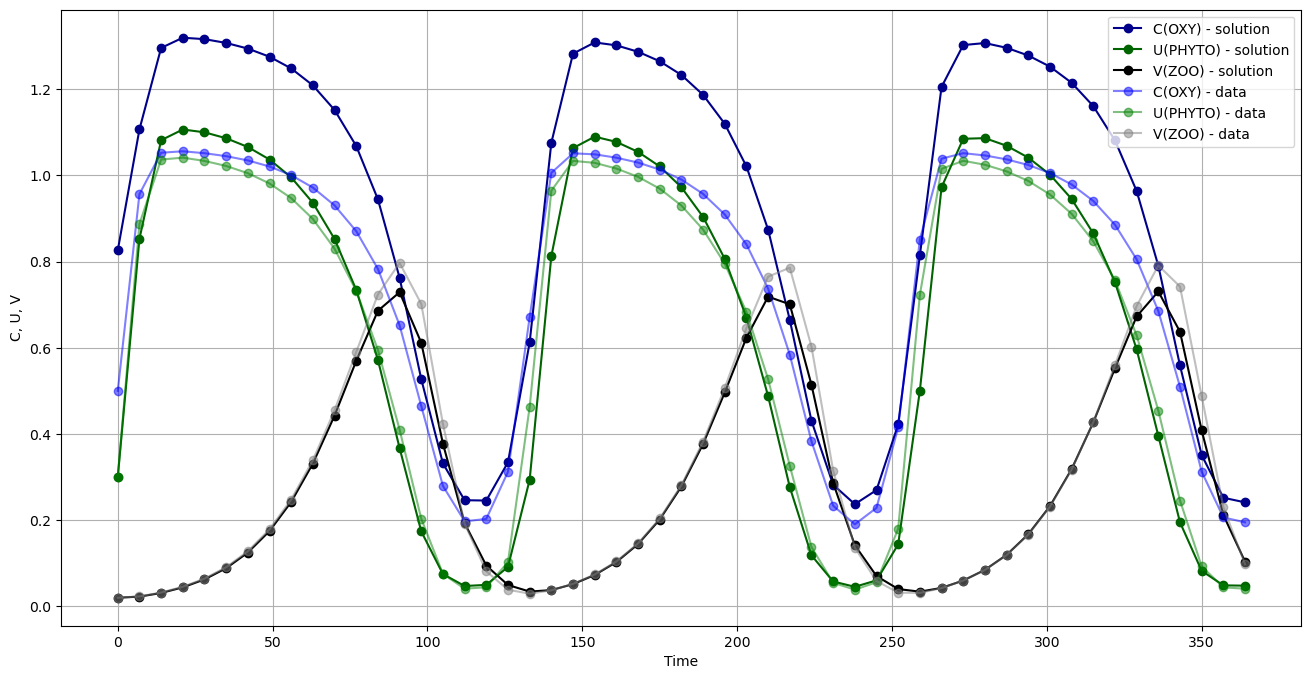

In [15]:
shower.show_solution_and_data(solution_new, data)